In [89]:
import os

# List files in the directory
print(os.listdir(r'C:\Users\hp\Music\data'))
import os
print(os.getcwd())
import pandas as pd
import os

# List files to check if 'togo-dapaong_qc.csv' exists
print(os.listdir(r'C:\Users\hp\Music\data'))

# Load the dataset with the correct pathl
df = pd.read_csv(r'C:\Users\hp\Music\data\benin-malanville.csv', encoding='latin-1')

# Display the first few rows
df.head()

['benin-malanville.csv', 'benin_clean.csv', 'sierraleone-bumbuna.csv', 'togo-dapaong_qc.csv']
c:\Users\hp\Documents\Custom Office Templates\10 academy\solar-energy_-challenge_week1-\notebooks
['benin-malanville.csv', 'benin_clean.csv', 'sierraleone-bumbuna.csv', 'togo-dapaong_qc.csv']


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-08-09 00:01,-1.2,-0.2,-1.1,0.0,0.0,26.2,93.4,0.0,0.4,0.1,122.1,0.0,998,0,0.0,26.3,26.2,NaN
1,2021-08-09 00:02,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.6,0.0,0.0,0.0,0.0,0.0,998,0,0.0,26.3,26.2,NaN
2,2021-08-09 00:03,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.7,0.3,1.1,0.5,124.6,1.5,997,0,0.0,26.4,26.2,NaN
3,2021-08-09 00:04,-1.1,-0.1,-1.0,0.0,0.0,26.2,93.3,0.2,0.7,0.4,120.3,1.3,997,0,0.0,26.4,26.3,NaN
4,2021-08-09 00:05,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.3,0.1,0.7,0.3,113.2,1.0,997,0,0.0,26.4,26.3,NaN


In [90]:
df.describe()

,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,0.0
mean,240.559452,167.187516,115.358961,236.589496,228.883576,28.179683,54.487969,2.121113,2.809195,0.473390,153.435172,8.582407,994.197199,0.000923,0.001905,35.246026,32.471736,NaN
std,331.131327,261.710501,158.691074,326.894859,316.536515,5.924297,28.073069,1.603466,2.029120,0.273395,102.332842,6.385864,2.474993,0.030363,0.037115,14.807258,12.348743,NaN
min,-12.900000,-7.800000,-12.600000,0.000000,0.000000,11.000000,2.100000,0.000000,0.000000,0.000000,0.000000,0.000000,985.000000,0.000000,0.000000,9.000000,8.100000,NaN
25%,-2.000000,-0.500000,-2.100000,0.000000,0.000000,24.200000,28.800000,1.000000,1.300000,0.400000,59.000000,3.700000,993.000000,0.000000,0.000000,24.200000,23.600000,NaN
50%,1.800000,-0.100000,1.600000,4.500000,4.300000,28.000000,55.100000,1.900000,2.600000,0.500000,181.000000,8.600000,994.000000,0.000000,0.000000,30.000000,28.900000,NaN
75%,483.400000,314.200000,216.300000,463.700000,447.900000,32.300000,80.100000,3.100000,4.100000,0.600000,235.100000,12.300000,996.000000,0.000000,0.000000,46.900000,41.500000,NaN
max,1413.000000,952.300000,759.200000,1342.300000,1342.300000,43.800000,100.000000,19.500000,26.600000,4.200000,360.000000,99.400000,1003.000000,1.000000,2.500000,81.000000,72.500000,NaN


In [91]:
missing_values = df.isna().sum()
print(missing_values)

Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64


In [92]:
total_rows = len(df)
missing_percentage = (missing_values / total_rows) * 100
columns_with_missing = missing_percentage[missing_percentage > 5]

print(columns_with_missing)

Comments    100.0
dtype: float64


In [93]:
from scipy.stats import zscore

# Compute Z-scores for specified columns
df[['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']] = zscore(df[['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']])

In [94]:
# Flagging outliers
outliers = (abs(df[['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']]) > 3)

In [95]:
from scipy import stats
import numpy as np

# Calculate Z-scores
z_scores = np.abs(stats.zscore(df[['GHI', 'DNI', 'DHI']]))

# Remove outliers
df_clean = df[(z_scores < 3).all(axis=1)]

Index(['Timestamp', 'GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb', 'RH', 'WS',
       'WSgust', 'WSstdev', 'WD', 'WDstdev', 'BP', 'Cleaning', 'Precipitation',
       'TModA', 'TModB', 'Comments'],
      dtype='object')


C:\Users\hp\AppData\Local\Temp\ipykernel_18384\559011506.py:13: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df.resample('M')['GHI'].mean().plot(title='Monthly Average GHI')


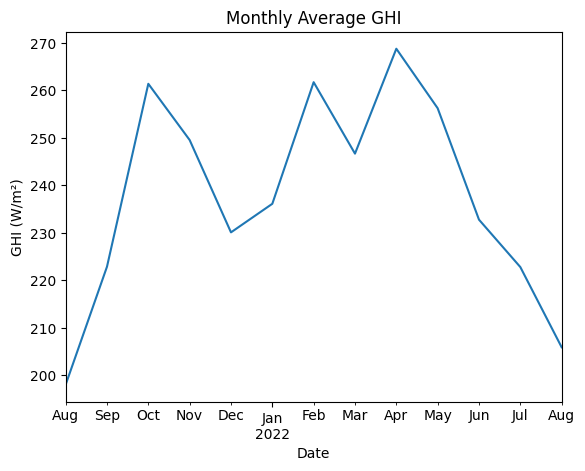

In [96]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv(r'C:\Users\hp\Music\data\benin-malanville.csv', encoding='latin-1')
print(df.columns)

# Convert the 'Timestamp' column to datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Set the 'Timestamp' as the index
df.set_index('Timestamp', inplace=True)

# Resample data by month and plot
df.resample('M')['GHI'].mean().plot(title='Monthly Average GHI')
plt.xlabel('Date')
plt.ylabel('GHI (W/m²)')
plt.show()

In [97]:
print(df.head())

                     GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
Timestamp                                                                 
2021-08-09 00:01:00 -1.2 -0.2 -1.1   0.0   0.0  26.2  93.4  0.0     0.4   
2021-08-09 00:02:00 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.6  0.0     0.0   
2021-08-09 00:03:00 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.7  0.3     1.1   
2021-08-09 00:04:00 -1.1 -0.1 -1.0   0.0   0.0  26.2  93.3  0.2     0.7   
2021-08-09 00:05:00 -1.0 -0.1 -1.0   0.0   0.0  26.2  93.3  0.1     0.7   

                     WSstdev     WD  WDstdev   BP  Cleaning  Precipitation  \
Timestamp                                                                    
2021-08-09 00:01:00      0.1  122.1      0.0  998         0            0.0   
2021-08-09 00:02:00      0.0    0.0      0.0  998         0            0.0   
2021-08-09 00:03:00      0.5  124.6      1.5  997         0            0.0   
2021-08-09 00:04:00      0.4  120.3      1.3  997         0            0.0   
2021-0

In [98]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv(r'C:\Users\hp\Music\data\togo-dapaong_qc.csv', encoding='latin-1')
print(df.columns)

Index(['Timestamp', 'GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb', 'RH', 'WS',
       'WSgust', 'WSstdev', 'WD', 'WDstdev', 'BP', 'Cleaning', 'Precipitation',
       'TModA', 'TModB', 'Comments'],
      dtype='object')


In [99]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

In [100]:
df.set_index('Timestamp', inplace=True)

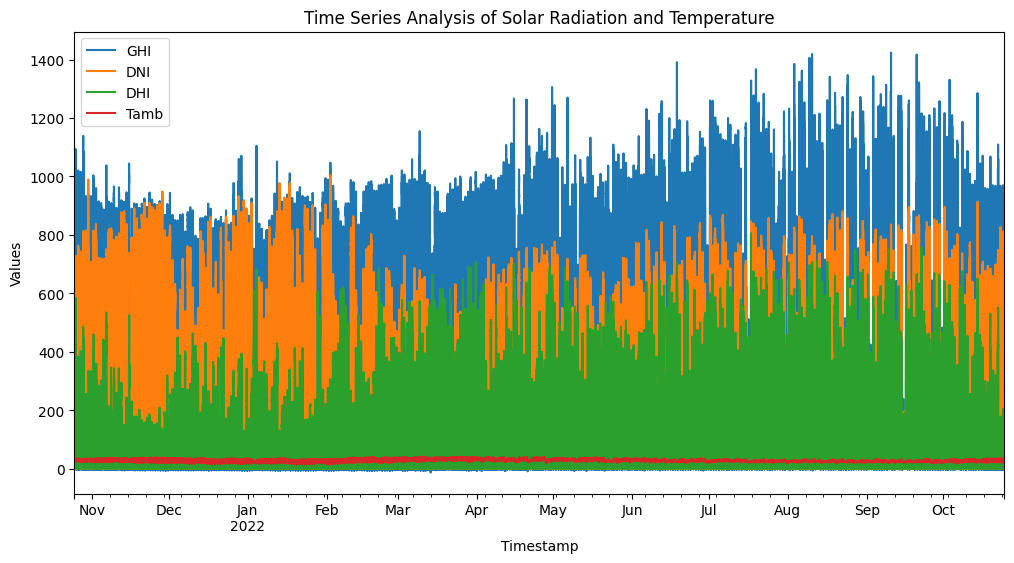

In [101]:
# Plotting GHI, DNI, DHI, and Tamb against Timestamp
df[['GHI', 'DNI', 'DHI', 'Tamb']].plot(figsize=(12, 6))
plt.title('Time Series Analysis of Solar Radiation and Temperature')
plt.xlabel('Timestamp')
plt.ylabel('Values')
plt.legend()
plt.show()

In [102]:
import pandas as pd
import os

# Load the dataset with the correct path
df = pd.read_csv(r'C:\Users\hp\Music\data\benin-malanville.csv', encoding='latin-1')
# Define the country variable
country = 'benin'  # Set this to the appropriate country name

# Create the directory if it doesn't exist
os.makedirs('benin/data', exist_ok=True)
# Export the cleaned DataFrame to a CSV file
df.to_csv(f'benin/data/{"benin"}_clean.csv', index=False)

<Axes: xlabel='Cleaning'>

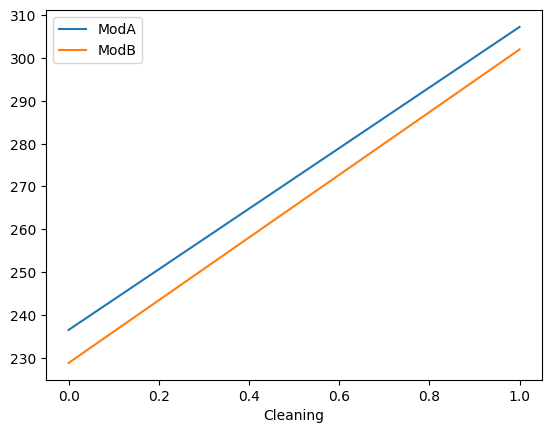

In [103]:
df.groupby('Cleaning')[['ModA', 'ModB']].mean().plot()

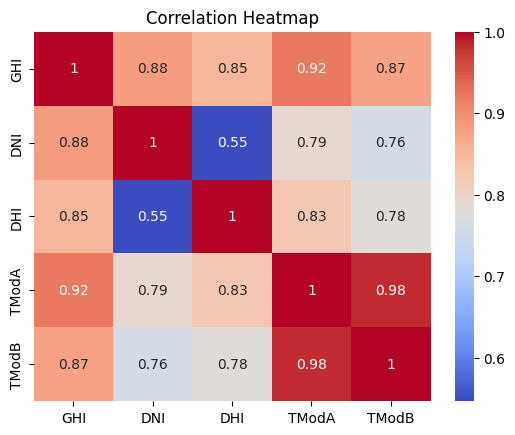

In [104]:
import seaborn as sns
import matplotlib.pyplot as plt  # Also import matplotlib for plotting
# Assuming df is your DataFrame
sns.heatmap(df[['GHI', 'DNI', 'DHI', 'TModA', 'TModB']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

(<Axes: xlabel='WS', ylabel='GHI'>, <Axes: xlabel='WS', ylabel='GHI'>)

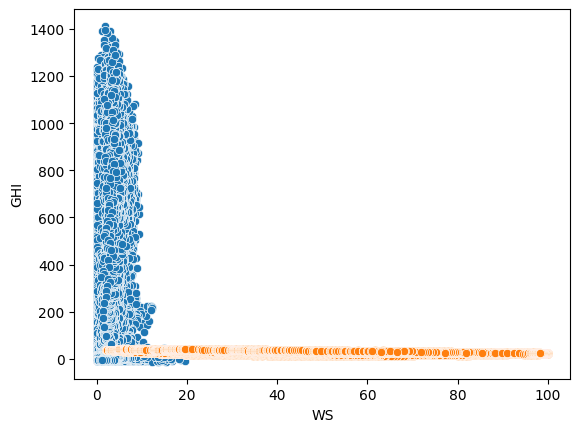

In [105]:
sns.scatterplot(data=df, x='WS', y='GHI'), sns.scatterplot(data=df, x='RH', y='Tamb')

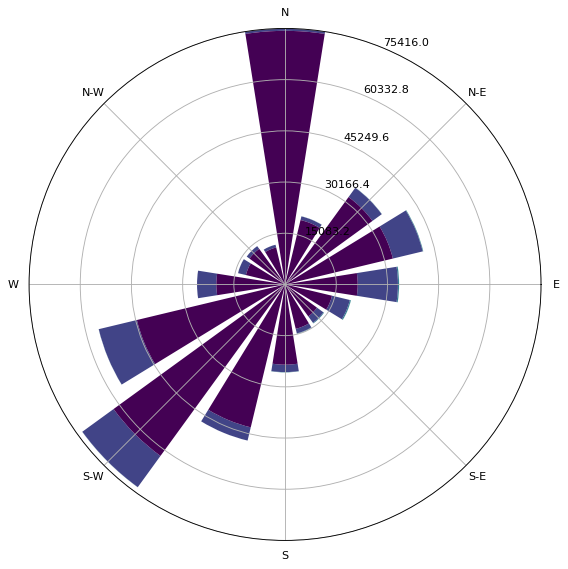

In [106]:
from windrose import WindroseAxes
ax = WindroseAxes.from_ax()
ax.bar(df['WD'], df['WS'])

<Axes: >

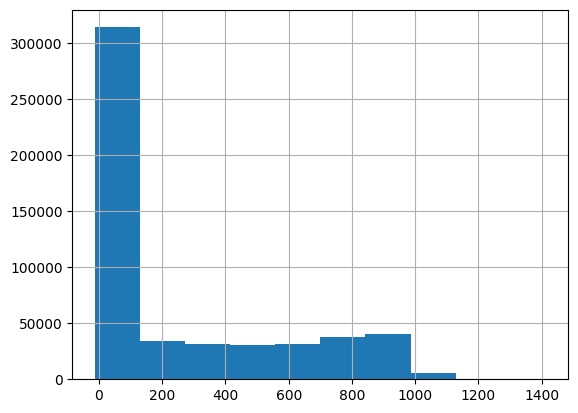

In [107]:
df['GHI'].hist()

<Axes: xlabel='RH', ylabel='Tamb'>

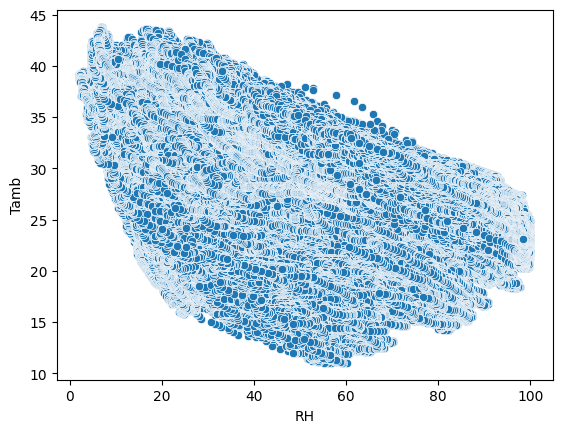

In [108]:
sns.scatterplot(data=df, x='RH', y='Tamb')

<Axes: xlabel='Tamb', ylabel='GHI'>

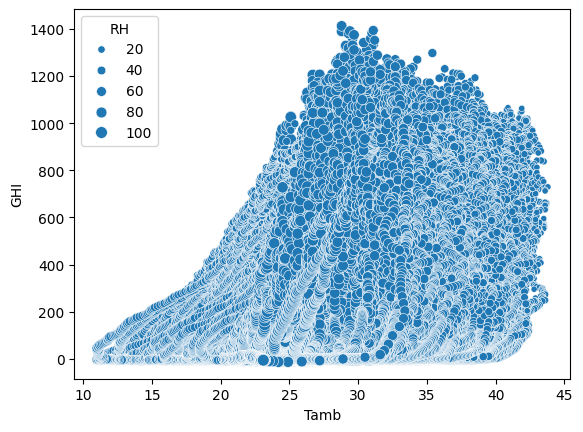

In [109]:
#Bubble Chart Analysis: Tamb vs. GHI with Size Representing RH
#The code snippet sns.scatterplot(data=df, x='Tamb', y='GHI', size='RH') generates a bubble chart to visualize the relationship between ambient temperature (Tamb) and Global Horizontal Irradiance (GHI), with the size of the bubbles representing relative humidity (RH). Here’s a detailed explanation:
sns.scatterplot(data=df, x='Tamb', y='GHI', size='RH') 

C:\Users\hp\AppData\Local\Temp\ipykernel_18384\376014360.py:24: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df.resample('M', on='Timestamp')['GHI'].mean().plot(


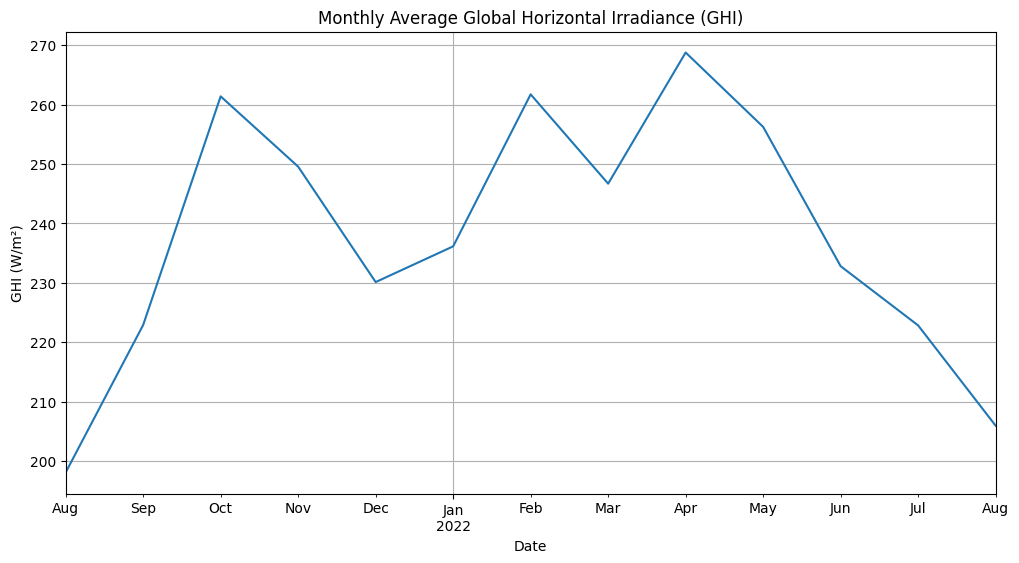

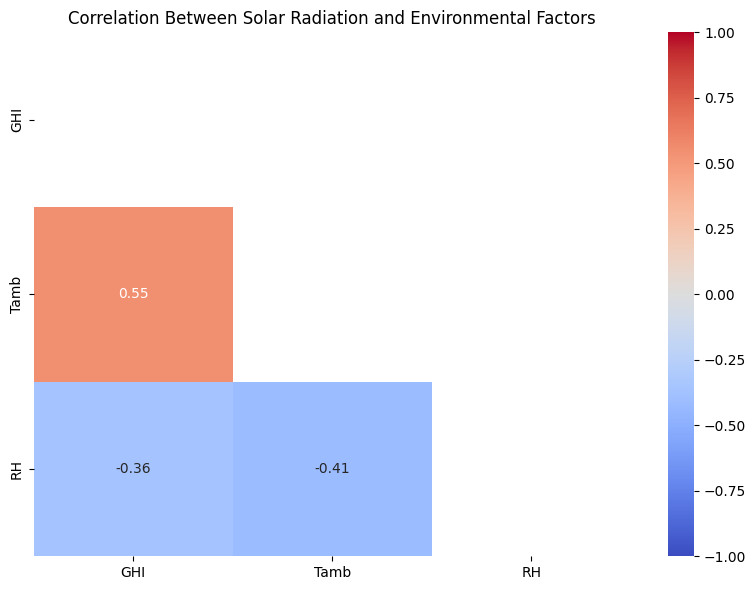

In [110]:
import os
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv(r'C:\Users\hp\Music\data\benin-malanville.csv', encoding='latin-1')

# Convert Timestamp to datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# --- Outlier Detection ---
# Select relevant columns and drop missing values first
temp_df = df[['GHI','DNI','DHI']].dropna()
z_scores = np.abs(stats.zscore(temp_df))      
df_clean = df[(z_scores < 3).all(axis=1)].copy()



# --- Time Series Plot ---
plt.figure(figsize=(12, 6))
df.resample('M', on='Timestamp')['GHI'].mean().plot(
    title='Monthly Average Global Horizontal Irradiance (GHI)',
    xlabel='Date',
    ylabel='GHI (W/m²)'
)
plt.grid(True)
plt.show()

# --- Correlation Heatmap ---
plt.figure(figsize=(8, 6))
sns.heatmap(df[['GHI','Tamb','RH']].corr(),
            annot=True,
            cmap='coolwarm',
            vmin=-1, vmax=1,
            mask=np.triu(np.ones_like(df[['GHI','Tamb','RH']].corr())))
plt.title('Correlation Between Solar Radiation and Environmental Factors')
plt.tight_layout()
plt.show()

In [111]:
print("Columns in dataset:", df.columns.tolist())
print("Missing values:\n", df.isna().sum())

Columns in dataset: ['Timestamp', 'GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb', 'RH', 'WS', 'WSgust', 'WSstdev', 'WD', 'WDstdev', 'BP', 'Cleaning', 'Precipitation', 'TModA', 'TModB', 'Comments']
Missing values:
 Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64


In [112]:
df_clean.to_csv(r'C:\Users\hp\Music\data\benin_clean.csv', index=False)